Importing Neccessary Libraries

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Reading Data from the file

In [155]:
data=pd.read_excel("admission.xlsx")
total_death_by_gender=pd.read_excel("admission.xlsx",sheet_name="TotalByGender",index_col="Month")

In [156]:
data.shape

(31, 37)

Transform Data

In [157]:
df=pd.DataFrame({'Disease':[],'Month':[],"Total  patients":[],"Discharged":[],"Died":[]})
diseases=data['Diseases'].drop(index=0).dropna()
for i in range(1,data.columns.size,3):
    v=data[data.columns[i:i+3]].dropna()
    month=data.columns[i]
    v.columns=v.iloc[0]
    v.drop(index=0,inplace=True)
    v["Disease"]=diseases
    v["Month"]=[month for j in range(diseases.size)]
    df = pd.concat([df, v], ignore_index=True)

In [158]:
df['Died']=df['Died'].astype(float)
df['Total  patients']=df['Total  patients'].astype(float)
df['Discharged']=df['Discharged'].astype(float)
df['Year']=2022


In [159]:
# df.to_excel("Data.xlsx",index=False)
df.size

1152

In [160]:
#View Columns
df.columns

Index(['Disease', 'Month', 'Total  patients', 'Discharged', 'Died', 'Year'], dtype='object')

In [161]:
# check for missing values:
df.isnull().sum()


Disease            0
Month              0
Total  patients    0
Discharged         0
Died               0
Year               0
dtype: int64

In [162]:
df.nunique()

Disease             16
Month               12
Total  patients    101
Discharged          98
Died                73
Year                 1
dtype: int64

In [163]:
df['Died'].describe()

count    192.000000
mean      54.598958
std       94.704946
min        2.000000
25%       10.000000
50%       17.000000
75%       41.250000
max      384.000000
Name: Died, dtype: float64

Explanatory Data analysis

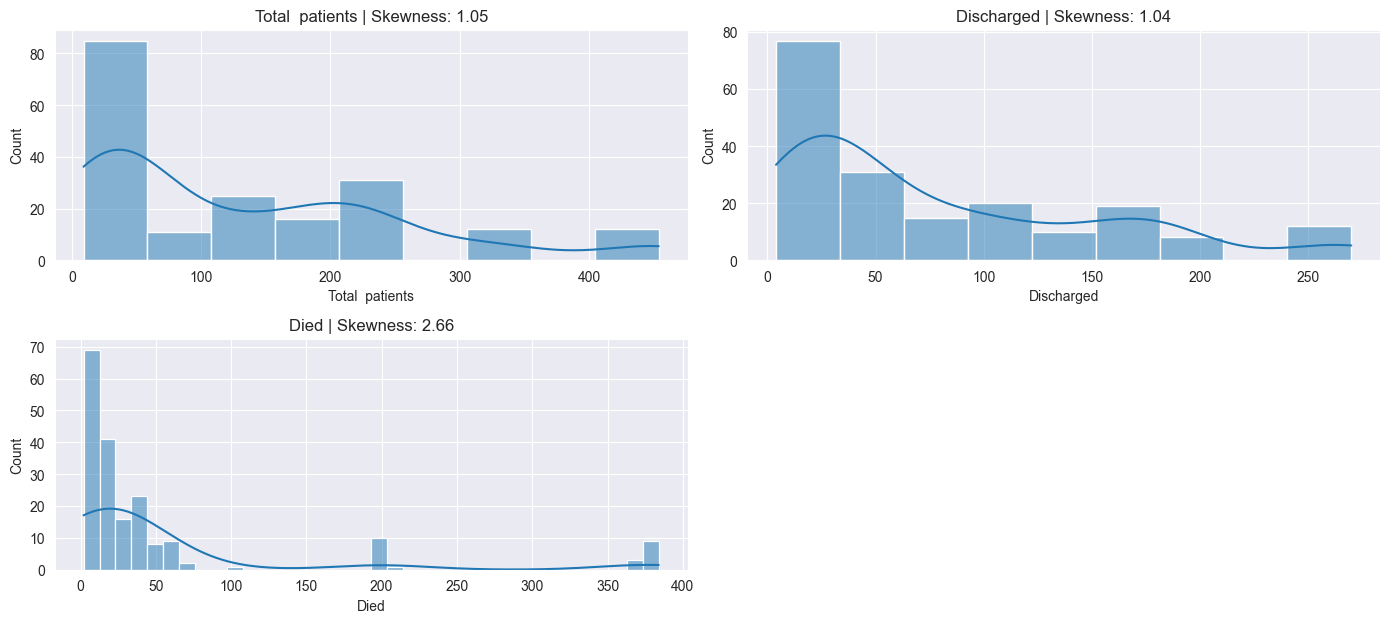

In [164]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [165]:
diseases_categories=df["Disease"].astype('category')
month_categories=df["Month"].astype('category')
df['Disease']=diseases_categories.cat.codes
df['Month'] =month_categories.cat.codes

X=df[['Disease', 'Month','Year']]
Y=df[['Total  patients', 'Discharged', 'Died']]

In [166]:
diseases_categories.cat.categories

Index(['Cerebral palsy', 'Chest indrawing', 'Convulsions', 'Diarrhea', 'Fever',
       'Hypothermia', 'Malaria', 'Not able to complete feeds',
       'Nutritional edema', 'Reduced consciousness',
       'Refused testing/died before testing', 'Severe anemia',
       'Severe pneumonia', 'Shock', 'Symptomatic hypoglycemia', 'Vomiting'],
      dtype='object')

In [167]:
month_categories.cat.categories

Index(['April ', 'August', 'December', 'July ', 'June', 'March ', 'May',
       'November', 'October', 'Septermber', 'february', 'january'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

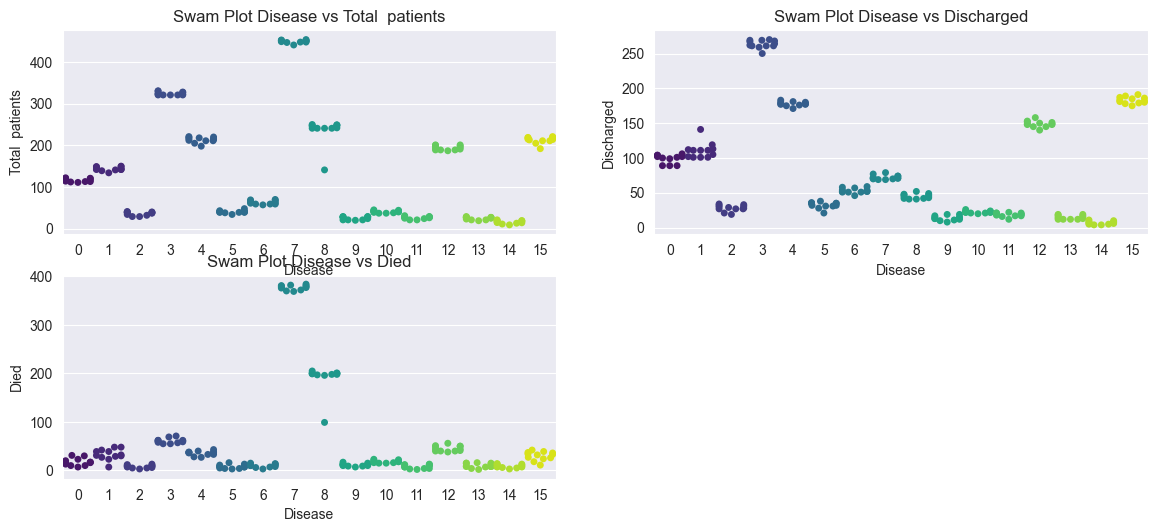

In [168]:

plt.figure(figsize=(10, 8))

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.swarmplot(x="Disease", y=feature, data=df, palette='viridis')
	plt.title(f"Swam Plot Disease vs {feature}")
	plt.xlabel('Disease')
	plt.ylabel(feature)
    
plt.show()


<Figure size 1000x800 with 0 Axes>

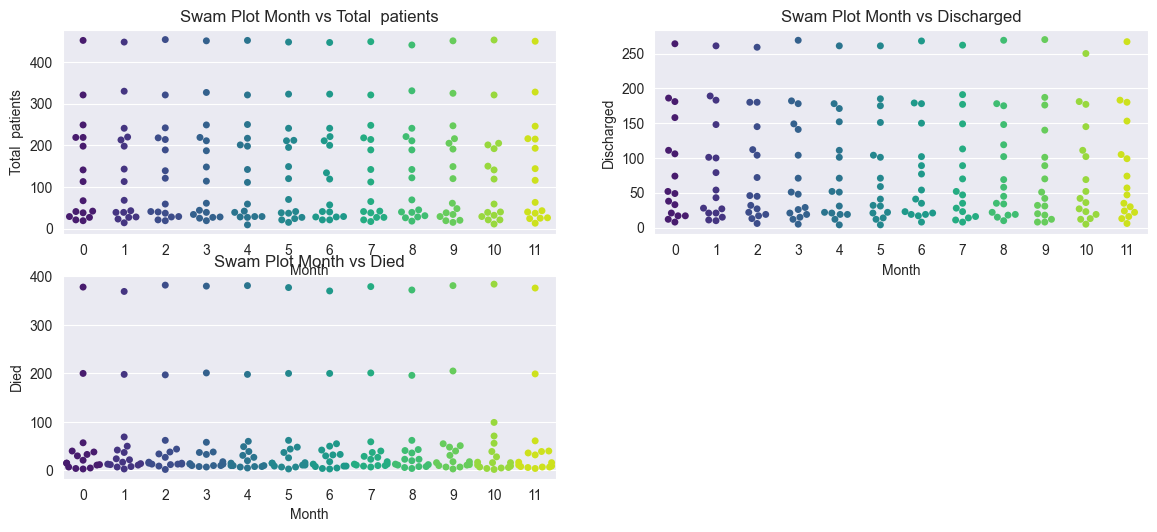

In [169]:
plt.figure(figsize=(10, 8))

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.swarmplot(x="Month", y=feature, data=df, palette='viridis')
	plt.title(f"Swam Plot Month vs {feature}")
	plt.xlabel('Month')
	plt.ylabel(feature)
    
plt.show()

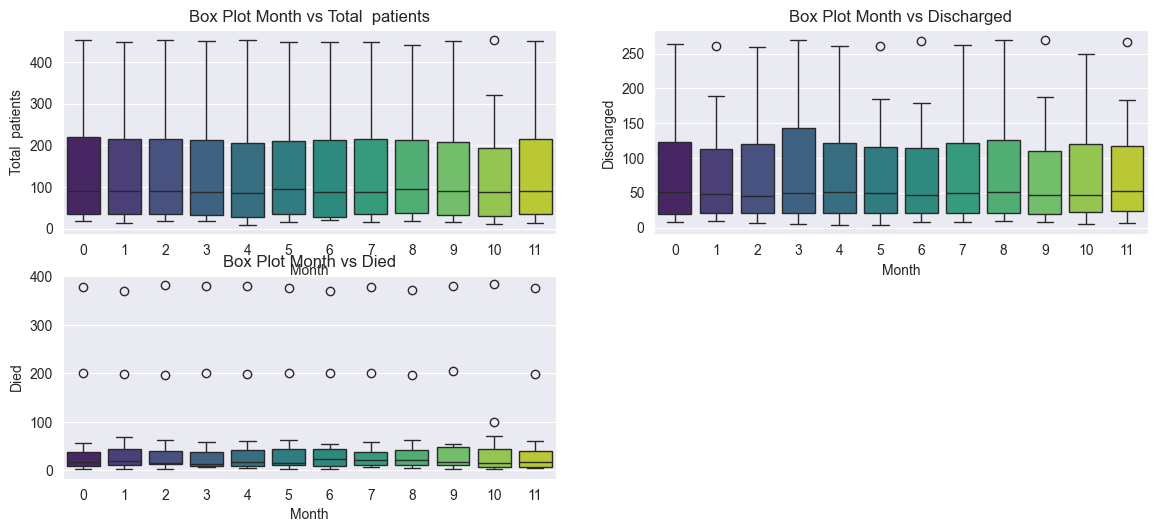

In [170]:

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.boxplot(x="Month", y=feature, data=df, palette='viridis')
	plt.title(f"Box Plot Month vs {feature}")
	plt.xlabel('Month')
	plt.ylabel(feature)
plt.show()



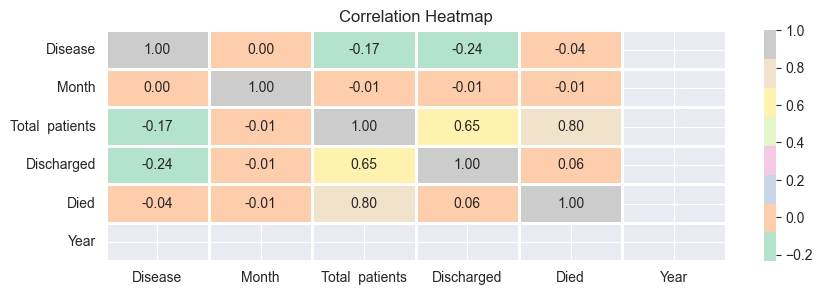

In [171]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 3))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


In [172]:
sum_per_month=df.groupby("Month").sum()
summary_per_month=df.groupby("Month").describe()

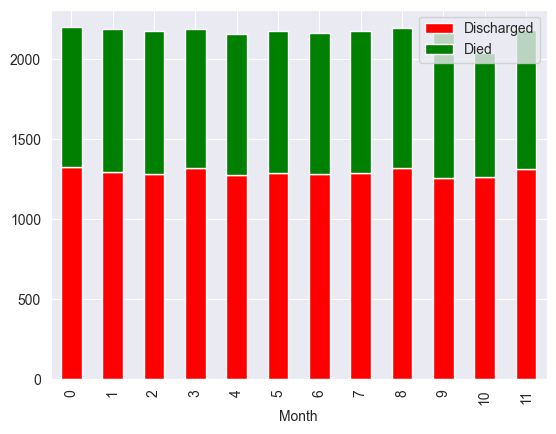

In [173]:
sum_per_month.loc[:,['Discharged', 'Died']].plot(kind='bar', stacked=True, color=['red', 'green'])
plt.show()

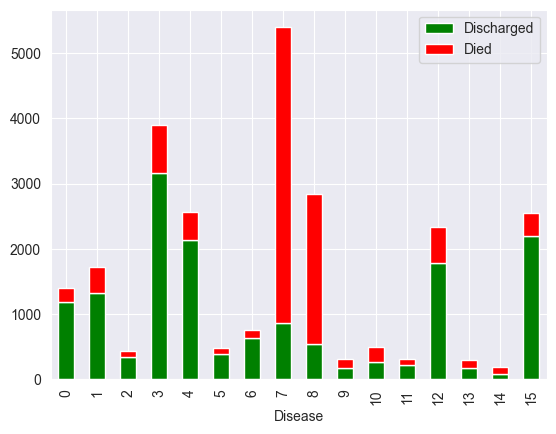

In [174]:
df.groupby("Disease").sum().loc[:,['Discharged', 'Died']].plot(kind='bar', stacked=True, color=['green', 'red'])
plt.show()

Transform data to range between 0-1 and split into train-test data

In [175]:
df.shape

(192, 6)

In [176]:
scaler = MinMaxScaler(feature_range=(0, 1))
Y_Scaled= scaler.fit_transform(Y.values)

x_train,x_test,y_train,y_test=train_test_split(X,Y_Scaled,test_size=0.2,shuffle=False)


In [177]:
dieseases=X['Disease'].unique()
months=X['Month'].unique()
to_predict_2023=pd.DataFrame({X.columns[0]:[],X.columns[1]:[],X.columns[2]:[]})
for month in months[-2:]:
    for disease in dieseases:
        v=pd.DataFrame({"Month":[int(month)],"Disease":[int(disease)],"Year":[2023]})
        to_predict_2023 = pd.concat([to_predict_2023, v], ignore_index=True)

In [178]:
random_forest_model=RandomForestRegressor(n_estimators=200,criterion="poisson")
random_forest_model.fit(x_train,y_train)
random_forest_predict=random_forest_model.predict(x_test)
rf_r2= r2_score(y_test,random_forest_predict)
rf_mse=mean_squared_error(y_test,random_forest_predict)
print(f"Fandom Forest, MSE={rf_mse}, R2={rf_r2}")

Fandom Forest, MSE=0.00017391210169682647, R2=0.9976782628401929


In [179]:
random_forest_predict= pd.DataFrame(scaler.inverse_transform(random_forest_predict),columns=Y.columns)
s_y_test =  pd.DataFrame(scaler.inverse_transform(y_test),columns=Y.columns)
predict_2023= pd.DataFrame(scaler.inverse_transform(random_forest_model.predict(to_predict_2023)),columns=Y.columns)

In [180]:
predicted=pd.concat([random_forest_predict,predict_2023],axis=0)

In [181]:
predicted.reset_index(inplace=True)

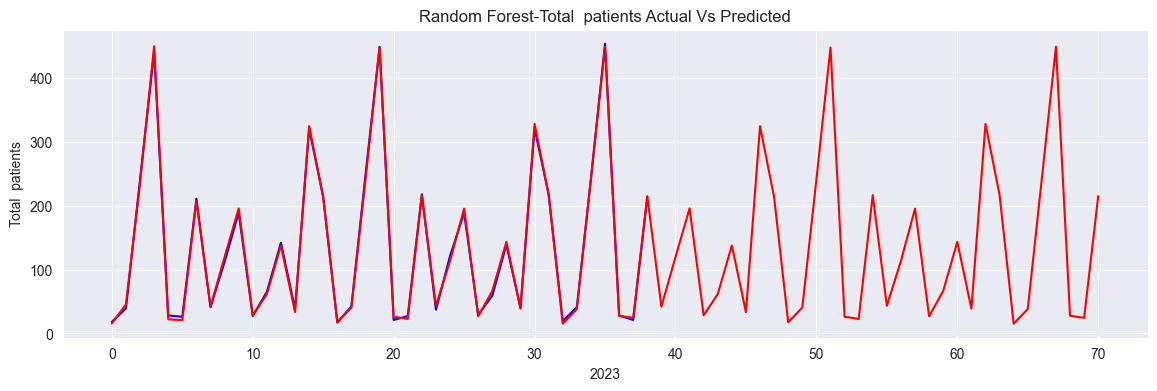

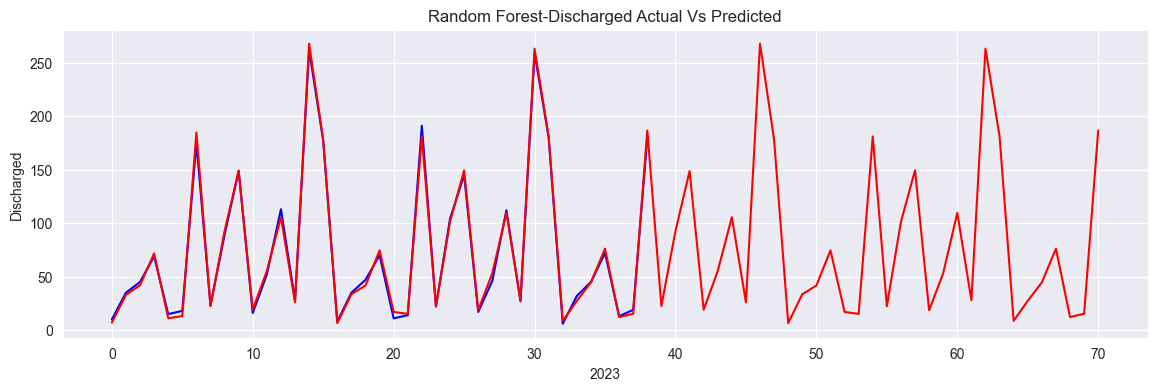

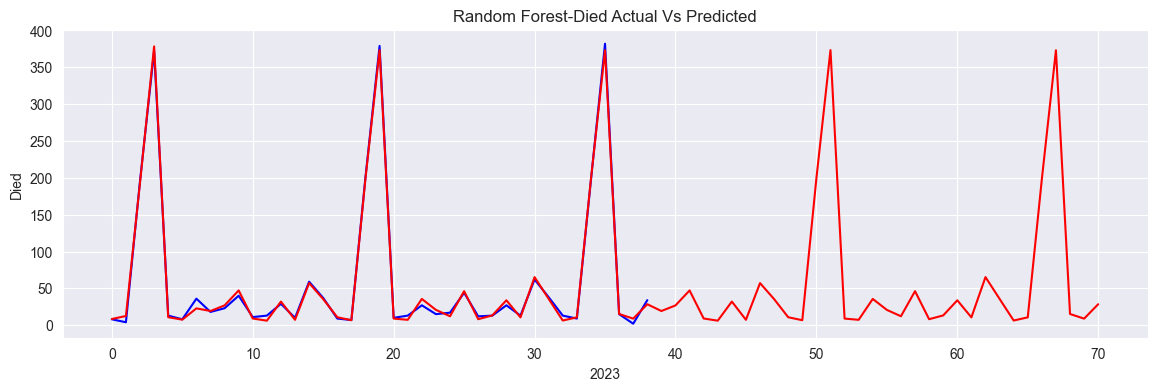

In [182]:

for idx, feature in enumerate(Y.columns, 1):
    plt.figure(figsize=(14, 4))
    plt.plot( s_y_test[feature], label=f"Actual-{feature}", color='blue')
    plt.plot(predicted[feature], label=f"Pred-{feature}", color='red')
    plt.title(f'Random Forest-{feature} Actual Vs Predicted')
    plt.xlabel('2023')
    plt.ylabel(f'{feature}')
    plt.show()
    


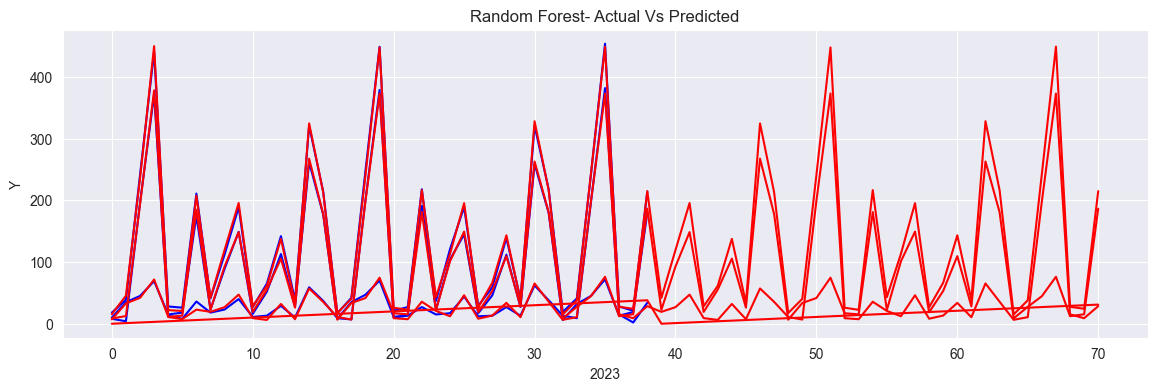

In [183]:
plt.figure(figsize=(14, 4))
plt.plot( s_y_test, label=f"Actual", color='blue')
plt.plot(predicted, label=f"Predicted", color='red')
plt.title(f'Random Forest- Actual Vs Predicted')
plt.xlabel('2023')
plt.ylabel('Y')
plt.show()

In [184]:
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3))
model.compile(loss="mse", optimizer="adam")

# Train the model
model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test),verbose=False,shuffle=False)

# Make predictions
y_pred = model.predict(x_test)

# Invert scaling for actual values
y_pred= pd.DataFrame(scaler.inverse_transform(y_pred),columns=Y.columns)

neural_r2=r2_score(s_y_test,y_pred)
neural_mse=mean_squared_error(s_y_test,y_pred)
print(f"Neural Network, MSE={neural_mse}, R2={neural_r2}")

2/2 [==============================] - 1s 25ms/step
Neural Network, MSE=20269.405559498544, R2=-0.8783135412038353


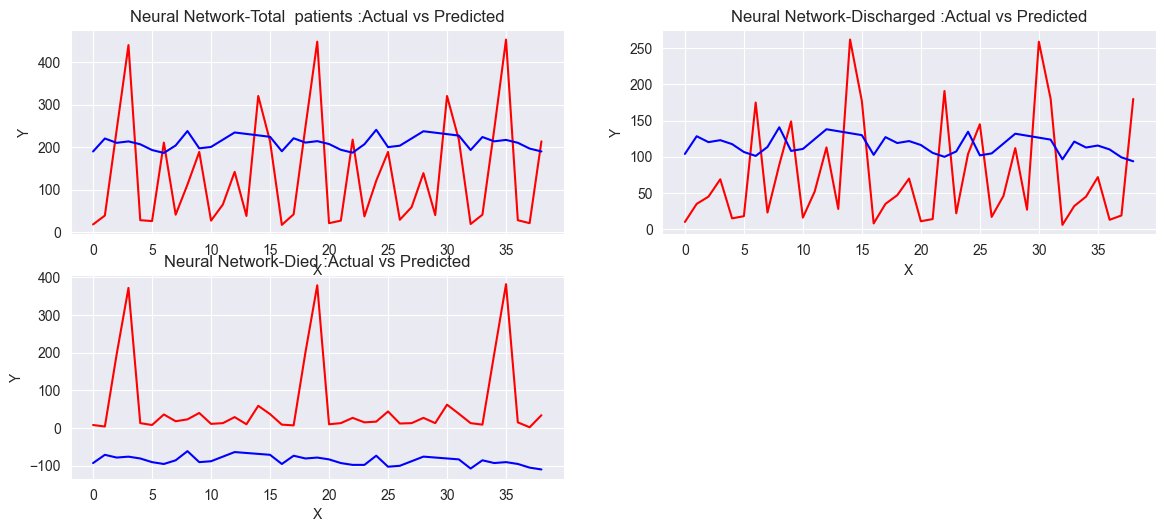

In [185]:
plt.figure(figsize=(14, len(Y.columns) * 3))
for idx, feature in enumerate(Y.columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    plt.plot( s_y_test[feature], label=f"Actual-{feature}", color='red')
    plt.plot(y_pred[feature], label=f"Pred-{feature}", color='blue')
    plt.title(f'Neural Network-{feature} :Actual vs Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    
plt.show()